<a href="https://colab.research.google.com/github/ZhechengLiao/ML-algorithm/blob/master/gda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def add_intercept(x):
    """Add intercept to matrix x.

    Args:
        x: 2D NumPy array.

    Returns:
        New matrix same as x with 1's in the 0th column.
    """
    new_x = np.zeros((x.shape[0], x.shape[1] + 1), dtype=x.dtype)
    new_x[:, 0] = 1
    new_x[:, 1:] = x

    return new_x


def load_dataset(csv_path, label_col='y', add_intercept=False):
    """Load dataset from a CSV file.

    Args:
         csv_path: Path to CSV file containing dataset.
         label_col: Name of column to use as labels (should be 'y' or 't').
         add_intercept: Add an intercept entry to x-values.

    Returns:
        xs: Numpy array of x-values (inputs).
        ys: Numpy array of y-values (labels).
    """

    def add_intercept_fn(x):
        global add_intercept
        return add_intercept(x)

    # Validate label_col argument
    allowed_label_cols = ('y', 't')
    if label_col not in allowed_label_cols:
        raise ValueError('Invalid label_col: {} (expected {})'
                         .format(label_col, allowed_label_cols))

    # Load headers
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    # Load features and labels
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
    l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
    inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
    labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)

    if inputs.ndim == 1:
        inputs = np.expand_dims(inputs, -1)

    if add_intercept:
        inputs = add_intercept_fn(inputs)

    return inputs, labels

In [4]:
x_train, y_train = load_dataset('ds1_train.csv', add_intercept=False)
x_test, y_test = load_dataset('ds1_valid.csv', add_intercept=False)
x_train.shape

(800, 2)

In [26]:
def fit(x, y):
  phi = np.mean(y)
  mu0 = np.mean(x[y==0], axis=0)
  mu1 = np.mean(x[y==1], axis=0)
  n_x = x[y==0] - mu0
  p_x = x[y==1] - mu1
  sigma = ((n_x.T).dot(n_x) + (p_x.T).dot(p_x))/x.shape[0]
  return phi, mu0, mu1, sigma

def predict(x):
  def _sigmoid(w, b, x):
    z = w.dot(x.T) + b
    return 1.0 / (1.0 + np.exp(-z))
  y_preds = []
  for y_pred in _sigmoid(k, b, x):
    if y_pred > 0.5:
      y_pred = 1.0
      y_preds.append(y_pred)
    else:
      y_pred = 0.0
      y_preds.append(y_pred)
  return y_preds

In [40]:
phi, mu0, mu1, sigma = fit(x_train, y_train)
inv_sigma = np.linalg.inv(sigma)
k = (inv_sigma).dot(mu1-mu0)
b =-1*np.log((1-phi)/phi)+0.5*((mu0.T.dot(np.linalg.inv(sigma))).dot(mu0)-mu1.T.dot(np.linalg.inv(sigma)).dot(mu1))
theta = np.append(k, b)

In [41]:
def plot(x, y, theta, save_path, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.

    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply, if any.
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta[0] / theta[2] + theta[1] / theta[2] * x1
           + np.log((2 - correction) / correction) / theta[2])
    plt.plot(x1, x2, c='red', linewidth=2)
    plt.xlim(x[:, -2].min()-.1, x[:, -2].max()+.1)
    plt.ylim(x[:, -1].min()-.1, x[:, -1].max()+.1)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.savefig(save_path)

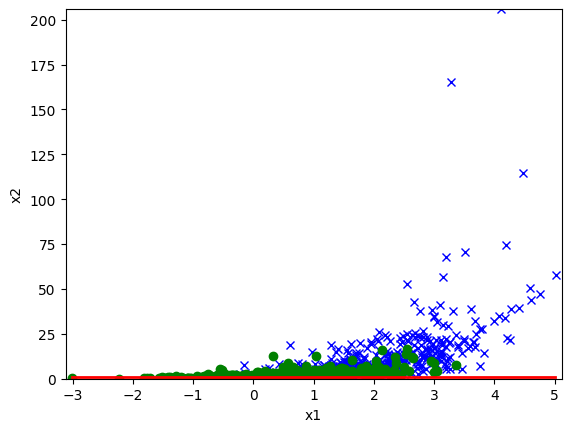

In [42]:
plot(x_train, y_train, theta, 'decision.png')